In [31]:
# # для установки библиотек
# ! pip3 install seaborn
# ! pip3 install plotly
# ! pip3 install ggplot
# ! pip3 install matplotlib
# ! pip3 install matplotlib==3.0.0

In [1]:
import warnings
warnings.simplefilter('ignore')

%pylab inline
%config InlineBackend.figure_format = 'svg' 

from pylab import rcParams
rcParams['figure.figsize'] = 10,5
import pandas as pd
import seaborn as sns

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Изучаем видеоигры

In [2]:
df = pd.read_csv('vg_sales.csv')
df.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
1           NaN        NaN         NaN       NaN    NaN  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
4           NaN        NaN         NaN       NaN    NaN

In [3]:
df = df.dropna()

In [4]:
df.head()

Name Platform  Year_of_Release     Genre Publisher  \
0             Wii Sports      Wii           2006.0    Sports  Nintendo   
2         Mario Kart Wii      Wii           2008.0    Racing  Nintendo   
3      Wii Sports Resort      Wii           2009.0    Sports  Nintendo   
6  New Super Mario Bros.       DS           2006.0  Platform  Nintendo   
7               Wii Play      Wii           2006.0      Misc  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
6     11.28      9.14      6.50         2.88         29.80          89.0   
7     13.96      9.18      2.93         2.84         28.92          58.0   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
6          65.0        8.5       431.0  Nintendo      E  
7          41.0        6.6       129.0  Nintendo      E

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [38]:
df['User_Score'] = df.User_Score.astype('float64')
df['Year_of_Release'] = df.Year_of_Release.astype('int64')
df['User_Count'] = df.User_Count.astype('int64')
df['Critic_Count'] = df.Critic_Count.astype('int64')

Оставим только интересуюшие нас колонки

In [39]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
              ]
df[useful_cols].head(10)

Name Platform  Year_of_Release     Genre  \
0                  Wii Sports      Wii             2006    Sports   
2              Mario Kart Wii      Wii             2008    Racing   
3           Wii Sports Resort      Wii             2009    Sports   
6       New Super Mario Bros.       DS             2006  Platform   
7                    Wii Play      Wii             2006      Misc   
8   New Super Mario Bros. Wii      Wii             2009  Platform   
11              Mario Kart DS       DS             2005    Racing   
13                    Wii Fit      Wii             2007    Sports   
14         Kinect Adventures!     X360             2010      Misc   
15               Wii Fit Plus      Wii             2009    Sports   

    Global_Sales  Critic_Score  Critic_Count  User_Score  User_Count Rating  
0          82.53          76.0            51         8.0         322      E  
2          35.52          82.0            73         8.3         709      E  
3          32.77          80.0            73         8.0         192      E  
6          29.80          89.0            65         8.5         431      E  
7          28.92          58.0            41         6.6         129      E  
8          28.32          87.0            80         8.4         594      E  
11         23.21          91.0            64         8.6         464      E  
13         22.70          80.0            63         7.7         146      E  
14         21.81          61.0            45         6.3         106      E  
15         21.79          80.0            33         7.4          52      E

In [44]:
df.Global_Sales.min()

0.01

In [40]:
[x for x in df.columns if 'Sales' in x]

['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

In [41]:
df1 = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]\
    .groupby('Year_of_Release').sum()
df1.head()

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Year_of_Release                                                         
1985                 0.00      0.03      0.00         0.01          0.03
1988                 0.00      0.02      0.00         0.01          0.03
1992                 0.02      0.00      0.00         0.00          0.03
1994                 0.39      0.26      0.53         0.08          1.27
1996                 7.91      6.88      4.06         1.24         20.10

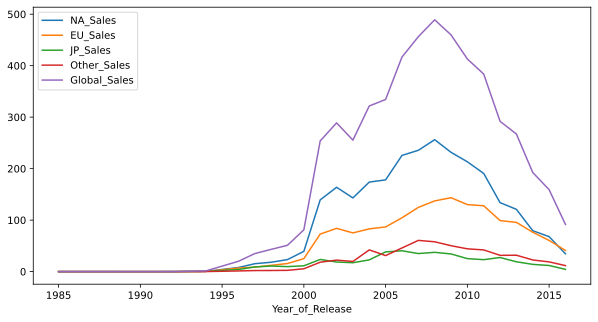

In [42]:
df1.plot();

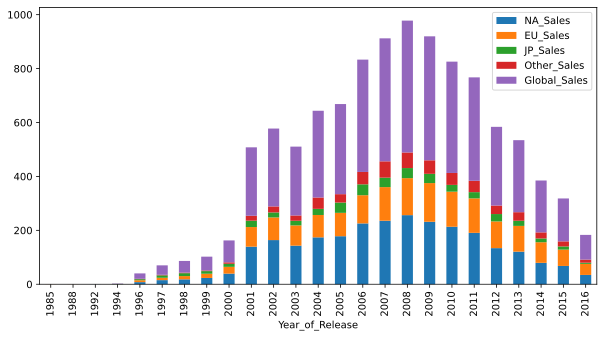

In [45]:
df1.plot(kind='bar', stacked=True);

In [46]:
list(filter(lambda x: x != 'Global_Sales', df1.columns))

['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

''

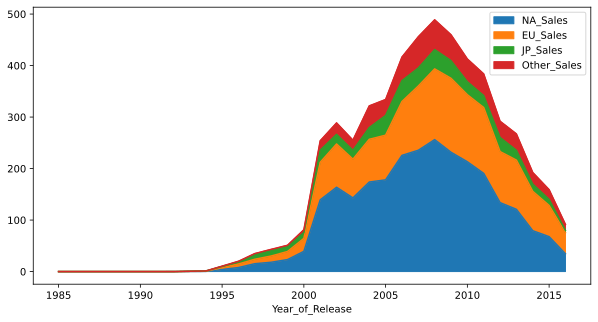

In [47]:
df1[list(filter(lambda x: x != 'Global_Sales', df1.columns))]\
    .plot(kind='area');""

Посмотрим на **распределение оценок критиков**.

<AxesSubplot: >

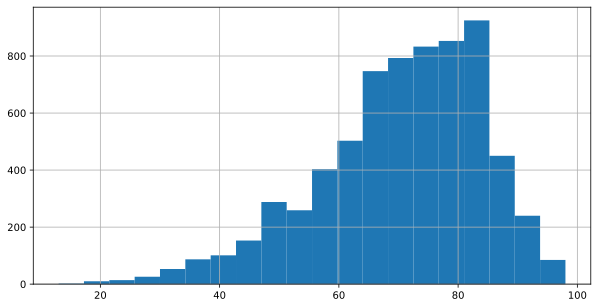

In [48]:
df.Critic_Score.hist(bins=20)

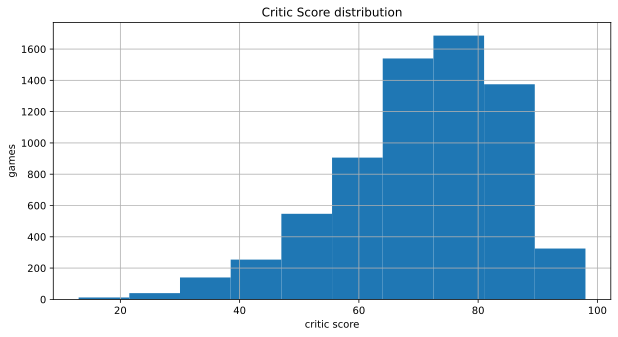

In [49]:
ax = df.Critic_Score.hist()
ax.set_title('Critic Score distribution')
ax.set_xlabel('critic score')
ax.set_ylabel('games');

У гистограмм можно контролировать, на сколько групп мы разбиваем распределение с помощью параметра `bins`.

Text(0, 0.5, 'games')

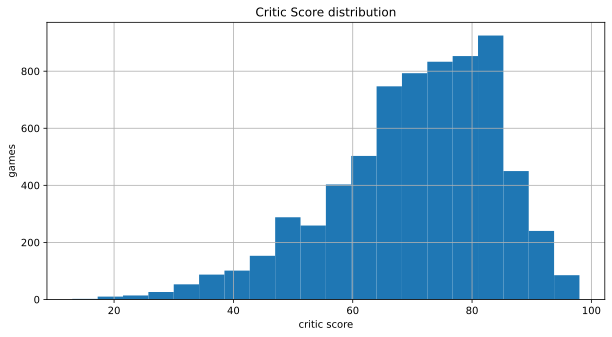

In [50]:
ax = df.Critic_Score.hist(bins = 20)
ax.set_title('Critic Score distribution')
ax.set_xlabel('critic score')
ax.set_ylabel('games')

### Полезные ссылки
 * [Документация pandas.plot](https://pandas.pydata.org/pandas-docs/stable/visualization.html)
 * [Документация pandas.style](http://pandas.pydata.org/pandas-docs/stable/style.html)
 * [Документация matplotlib](https://matplotlib.org/)

# <center> Seaborn


In [51]:
import seaborn as sns

In [52]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [53]:
sns_plot = sns.pairplot(
    df[['Global_Sales', 'Critic_Score', 'User_Score']]
);
sns_plot.savefig('pairplot.png')

<AxesSubplot: xlabel='Critic_Score', ylabel='Count'>

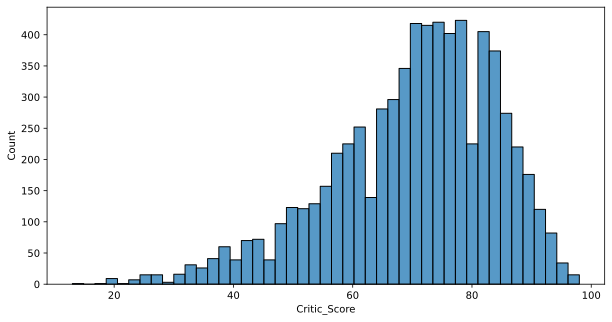

In [54]:
sns.histplot(df.Critic_Score)

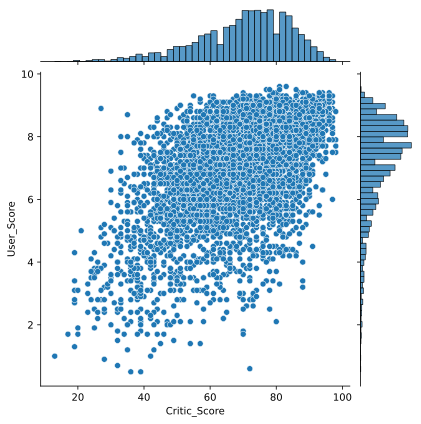

In [55]:
sns.jointplot(x='Critic_Score', y='User_Score', 
              data=df, kind='scatter');

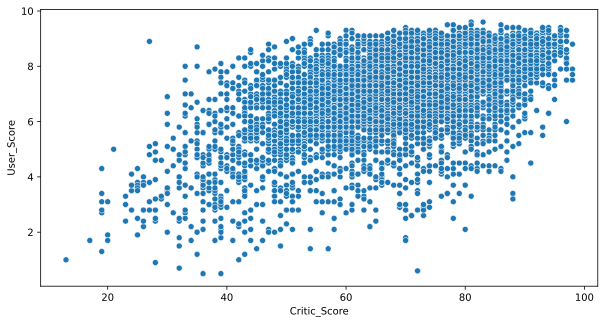

In [56]:
sns.scatterplot(x='Critic_Score', y='User_Score', 
              data=df);

<AxesSubplot: xlabel='Platform', ylabel='Critic_Score'>

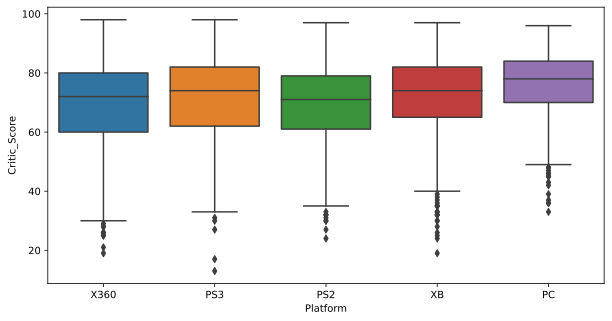

In [57]:
top_platforms = df.Platform.value_counts().sort_values(ascending=False).head(5).index.values
sns.boxplot(x="Platform", y="Critic_Score", 
            data=df[df.Platform.isin(top_platforms)])

In [60]:

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [61]:
global_sales_years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum()
global_sales_years_df.head()

Global_Sales
Year_of_Release              
1985                     0.03
1988                     0.03
1992                     0.03
1994                     1.27
1996                    20.10

In [62]:
released_years_df = df.groupby('Year_of_Release')[['Name']].count()
released_years_df.head()

Name
Year_of_Release      
1985                1
1988                1
1992                1
1994                1
1996                7

In [63]:
years_df = global_sales_years_df.join(released_years_df)
years_df.head()

Global_Sales  Name
Year_of_Release                    
1985                     0.03     1
1988                     0.03     1
1992                     0.03     1
1994                     1.27     1
1996                    20.10     7

In [64]:
years_df.columns = ['Global_Sales', 'Number_of_Games']
years_df.head()

Global_Sales  Number_of_Games
Year_of_Release                               
1985                     0.03                1
1988                     0.03                1
1992                     0.03                1
1994                     1.27                1
1996                    20.10                7

In [65]:
trace0 = go.Scatter(
    x=years_df.index,
    y=years_df.Global_Sales,
    name='Global Sales',
)

trace1 = go.Scatter(
    x=years_df.index,
    y=years_df.Number_of_Games,
    name='Number of games released',
)

data = [trace0, trace1]
layout = {'title': 'Statistics of video games'}

fig = go.Figure(data=data, layout=layout)
fig.show()
# iplot(fig, show_link = False)


Также можно сразу сохранить график в виде html-файла.

In [26]:
plotly.offline.plot(fig, filename='years_stats.html', show_link=False);

In [66]:
global_sales_platforms_df = df.groupby('Platform')[['Global_Sales']].sum()
released_platforms_df = df.groupby('Platform')[['Name']].count()
platforms_df = global_sales_platforms_df.join(released_platforms_df)

platforms_df.columns = ['Global_Sales', 'Number_of_Games']
platforms_df.sort_values('Global_Sales', inplace=True)
platforms_df = platforms_df.apply(lambda x: 100*x/platforms_df.sum(), axis = 1)
platforms_df.head()

Global_Sales  Number_of_Games
Platform                               
DC            0.085735         0.205128
PSV           0.581868         1.728938
WiiU          1.245136         1.304029
3DS           2.322006         2.271062
XOne          2.441469         2.329670

In [67]:
platforms_df.sum()

Global_Sales       100.0
Number_of_Games    100.0
dtype: float64

In [68]:
trace0 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Global_Sales,
    name='Global Sales',
    orientation = 'v',
)

trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Number_of_Games,
    name='Number of games released',
    orientation = 'v',
)

data = [trace0, trace1]
layout = {'title': 'Platforms share', 'xaxis': {'title': 'platform'}}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

In [69]:
df.Genre.unique()

array(['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Puzzle',
       'Shooter', 'Fighting', 'Simulation', 'Role-Playing', 'Adventure',
       'Strategy'], dtype=object)

In [70]:
data = []

for genre in df.Genre.unique():
    data.append(
        go.Box(y=df[df.Genre==genre].Critic_Score, 
               name=genre)
    )
iplot(data, show_link = False)

### Полезные ссылки
* [Галерея](https://plot.ly/python/)
* [Документация](https://plot.ly/python/reference/)